### Coding the teleportation circuitry

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import random
import numpy as np
from qiskit.result import marginal_counts

In [2]:
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    peter_alice_q = \
        QuantumRegister(1, 'peter/alice (q)')
    peter_bob_q = QuantumRegister(1, 'peter/bob (q)')
    bob_c = ClassicalRegister(3, 'bob (c)')
    circ = QuantumCircuit(alice_q, peter_alice_q,
                          peter_bob_q, bob_c)
    return circ

In [3]:
def generate_amplitudes():
    alpha = np.sqrt(random.uniform(0, 1))
    beta = np.sqrt(1 - alpha**2)
    return alpha, beta

In [4]:
def add_gates(circ, alpha, beta):
    circ.initialize([alpha, beta], 0)
    circ.barrier()
    circ.h(1)
    circ.cx(1, 2)
    circ.barrier()
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(0, 0)
    circ.measure(1, 1)
    with circ.if_test((1, 1)):
        circ.x(2)
    with circ.if_test((0, 1)):
        circ.z(2)
    circ.measure(2, 2)
    return circ

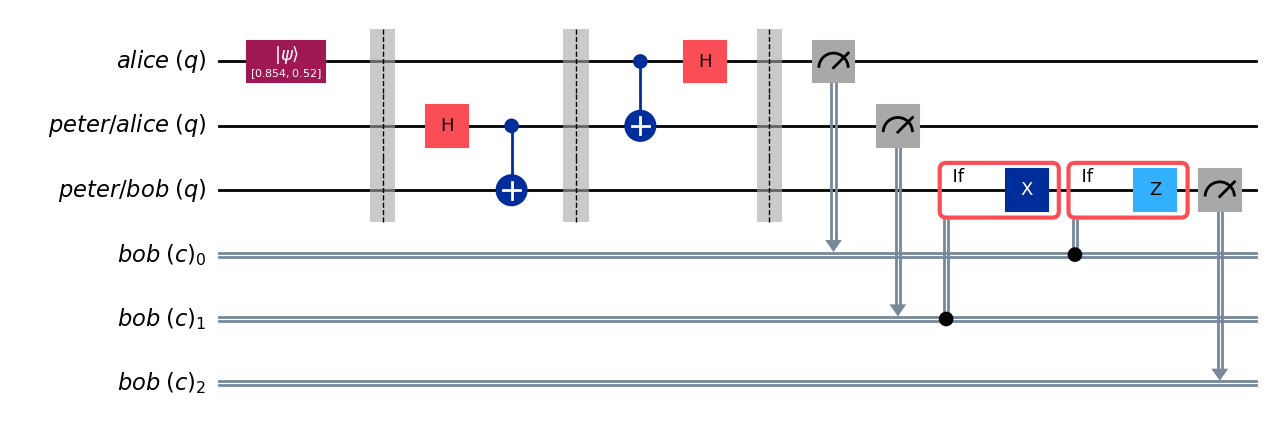

In [5]:
alpha, beta = generate_amplitudes()
circ = create_registers()
circ = add_gates(circ, alpha, beta)
display(circ.draw('mpl', cregbundle=False))

In [6]:
device = Aer.get_backend("qasm_simulator")

shots = 1000
job = device.run(circ, shots=shots)
print(job.job_id())

result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [2])
number_of_0s = counts_m.get('0') 
number_of_1s = counts_m.get('1') 
alpha = np.sqrt(number_of_0s / shots)
beta = np.sqrt(number_of_1s / shots)
print("|\u03C8\u27E9 ({:.4f}, {:.4f})".format(alpha, beta))

f3bd4184-516c-45f3-b941-624b06c882d4
|ψ⟩ (0.8390, 0.5441)


### Question 2

In [7]:
def generate_amplitudes():
    alpha = 0.8228 
    beta = 0.5683 
    return alpha, beta

### Question 3

In [9]:
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    bob_q = QuantumRegister(1, 'bob (q)')
    circ = QuantumCircuit(alice_q, bob_q)
    return circ

def add_gates(circ, alpha, beta):
    circ.initialize([alpha, beta], 0)
    circ.cx(0, 1)
    circ.measure_all()
    return circ

### Question 5

In [10]:
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    peter_alice_q = QuantumRegister(1, 'peter/alice (q)')
    peter_bob_q = QuantumRegister(1, 'peter/bob (q)')
    bob_c = ClassicalRegister(3, 'bob (c)')
    pedro_bob_q = QuantumRegister(1, 'pedro/bob (q)')
    pedro_carol_q = QuantumRegister(1, 'pedro/carol (q)')
    carol_c = ClassicalRegister(3, 'carol (c)')
    circ = QuantumCircuit(alice_q, peter_alice_q,
                          peter_bob_q, bob_c,
                          pedro_bob_q, pedro_carol_q,
                          carol_c)
    return circ

def add_gates(circ, alpha, beta):
    circ.initialize([alpha, beta], 0)
    circ.barrier()
    circ.h(1)
    circ.cx(1, 2)
    circ.barrier()
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(0, 0)
    circ.measure(1, 1)
    with circ.if_test((1, 1)):
        circ.x(2) 
    with circ.if_test((0, 1)):
        circ.z(2)
    circ.barrier()
    
    circ.h(3)
    circ.cx(3, 4)
    circ.barrier()
    circ.cx(2, 3)
    circ.h(2)
    circ.barrier()
    circ.measure(2, 3)
    circ.measure(3, 4)
    with circ.if_test((4, 1)):
        circ.x(4) 
    with circ.if_test((3, 1)):
        circ.z(4) 
    
    circ.measure(4, 5)
    return circ

result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [5])
number_of_0s = counts_m.get('0') 
number_of_1s = counts_m.get('1') 
alpha = np.sqrt(number_of_0s / shots)
beta = np.sqrt(number_of_1s / shots)
print("|\u03C8\u27E9 ({:.4f}, {:.4f})".format(alpha, beta))

QiskitError: 'indices must be in range [0, 2].'